## Procedure to generate aer2vec as per:
Jake Portanova, Nathan Murray, Justin Mower, Devika Subramanian, Trevor Cohen. aer2vec: Distributed Representations of Adverse Event Reporting System Data as a Means to Identify Drug/Side-Effect Associations. 
AMIA Annual Symposium Proceedings 2019. 

In [15]:
#download textfiles derived from https://www.nature.com/articles/sdata201626
#Banda, J. M., Evans, L., Vanguri, R. S., Tatonetti, N. P., Ryan, P. B., & Shah, N. H. (2016). A curated and standardized adverse drug event resource to accelerate drug safety research. Scientific data, 3, 160026. doi:10.1038/sdata.2016.26
!wget https://zenodo.org/record/3283012/files/textfiles.tar.gz

--2019-07-09 16:52:20--  https://zenodo.org/record/3283012/files/textfiles.tar.gz
Resolving zenodo.org... 188.184.65.20
Connecting to zenodo.org|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512787327 (489M) [application/octet-stream]
Saving to: ‘textfiles.tar.gz’

textfiles.tar.gz    100%[===================>] 489.03M  11.9MB/s    in 67s     

2019-07-09 16:53:28 (7.32 MB/s) - ‘textfiles.tar.gz’ saved [512787327/512787327]



In [16]:
!tar xvzf textfiles.tar.gz

x textfiles/
x textfiles/ps_switch.txt
x textfiles/psss_switch.txt
x textfiles/psss.txt
x textfiles/banda_switch.txt
x textfiles/banda.txt
x textfiles/ps.txt


In [17]:
#examine files - the ">" sign indicates which concepts will have output weight vectors
!ls textfiles
#e.g. ps.txt - >drug - drugs have output weights, train for P(drug|ADE)
#each line was derived from a single FAERS report
!head textfiles/ps.txt
#we won't bother cleaning up the headers as these won't affect downstream vector construction

banda.txt        ps.txt           ps_switch.txt    psss_switch.txt
banda_switch.txt ps_index         psss.txt
drug_names pt_names
>omalizumab asthma bronchopulmonary_aspergillosis c-reactive_protein_increased lung_infection pyrexia white_blood_cell_count_increased
>levonorgestrel condition_aggravated glaucoma optic_nerve_disorder vision_blurred
>esomeprazole multiple_fractures osteoporosis
>bosentan cardiac_failure diarrhoea pathogen_resistance sputum_culture_positive
>adalimumab coronary_artery_disease
>levonorgestrel pregnancy_with_contraceptive_device
>adalimumab injection_site_pain
>rosiglitazone macrocytosis
>aripiprazole tardive_dyskinesia


In [13]:
#get and compile 'Bleeding Edge' branch of Semantic Vectors - likely to be available in Master branch in the near future
!git clone https://www.github.com/semanticvectors/semanticvectors --branch BleedingEdge; cd semanticvectors; mvn install -P endUserRelease; cd ../

Cloning into 'semanticvectors'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 17331 (delta 106), reused 140 (delta 5), pack-reused 17090
Receiving objects: 100% (17331/17331), 3.25 MiB | 0 bytes/s, done.
Resolving deltas: 100% (11671/11671), done.
[INFO] Scanning for projects...
[INFO]                                                                         
[INFO] ------------------------------------------------------------------------
[INFO] Building semanticvectors 5.9
[INFO] ------------------------------------------------------------------------
[INFO] 
[INFO] --- maven-enforcer-plugin:1.0:enforce (enforce-maven) @ semanticvectors ---
[INFO] 
[INFO] --- maven-resources-plugin:2.6:resources (default-resources) @ semanticvectors ---
[INFO] Using 'UTF-8' encoding to copy filtered resources.
[INFO] skip non existing resourceDirectory /Users/tcohen1/aer2vec/semanticvectors/src/ma

In [14]:
#Rebuild Lucene index to reproduce the best performing configuration
!cd textfiles; java -cp ../semanticvectors/target/semanticvectors-5.9.jar pitt.search.lucene.IndexFlatFilePositions -analysismethod WHITESPACEANALYZER -luceneindexpath ps_index ps.txt

Indexing to directory 'ps_index'...
added 100000 lines
added 200000 lines
added 300000 lines
added 400000 lines
added 500000 lines
added 600000 lines
added 700000 lines
added 800000 lines
added 900000 lines
added 1000000 lines
added 1100000 lines
added 1200000 lines
added 1300000 lines
added 1400000 lines
added 1500000 lines
added 1600000 lines
added 1700000 lines
added 1800000 lines
added 1900000 lines
added 2000000 lines
added 2100000 lines
added 2200000 lines
added 2300000 lines
added 2400000 lines
added 2500000 lines
added 2600000 lines
added 2700000 lines
added 2800000 lines
added 2900000 lines
added 3000000 lines
added 3100000 lines
added 3200000 lines
added 3300000 lines
added 3400000 lines
added 3500000 lines
added 3600000 lines
added 3700000 lines
added 3800000 lines
added 3900000 lines
added 4000000 lines
added 4100000 lines
added 4200000 lines
added 4300000 lines
added 4400000 lines
added 4500000 lines
added 4600000 lines
61140 total milliseconds


In [103]:
#generate embeddings - increase the numthreads parameter in accordance with available CPU cores
!cd textfiles; java -Xmx8G -cp ../semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.InNoutEmbeddings -luceneindexpath ps_index -dimension 100 -seedlength 100  -samplingthreshold -1 -negsamples 5 -trainingcycles 4 -encodingmethod embeddings -notnormalized -numthreads 10 -stoplistfile ../stoplistTot.txt > output.txt

Building SRI model from index in: ps_index
Minimum frequency = 0
Maximum frequency = 2147483647
Number non-alphabet characters = 2147483647
Jul 06, 2019 6:38:05 PM pitt.search.semanticvectors.LuceneUtils loadStopWords
INFO: Using stopword file: ../stoplistTot.txt
Initialized LuceneUtils from Lucene index in directory: ps_index
Fields in index are: line_number, modified, contents
There are 19508994 terms (and 4656300 docs)Cycle 0Initialized TermVector Queue with 50000 documents
Starting thread 0...Starting thread 1...Starting thread 2...Starting thread 3...Starting thread 4...Starting thread 5...Starting thread 6...Starting thread 7...Starting thread 8...Starting thread 9...[T3] processed 0 documents in 1 min..[T5] processed 0 documents in 1 min..[T4] processed 0 documents in 2 min..[T1] processed 0 documents in 2 min..[T7] processed 0 documents in 2 min..[T9] processed 0 documents in 1 min..[T0] processed 0 documents in 2 min..[T8] processed 0 documents in 2 min..[T6] processed 0 docum

1860000 ... [T7] processed 190000 documents in 0 min..1870000 ... 1880000 ... [T9] processed 190000 documents in 0 min..1890000 ... [T3] processed 190000 documents in 0 min..[T0] processed 190000 documents in 0 min..1900000 ... Initialized TermVector Queue with 50000 documents
[T6] processed 190000 documents in 0 min..[T1] processed 190000 documents in 0 min..[T4] processed 190000 documents in 0 min..[T5] processed 190000 documents in 0 min..1910000 ... [T2] processed 190000 documents in 0 min..1920000 ... 1930000 ... [T8] processed 190000 documents in 0 min..1940000 ... 1950000 ... Initialized TermVector Queue with 50000 documents
1960000 ... [T7] processed 200000 documents in 0 min..1970000 ... 1980000 ... [T9] processed 200000 documents in 0 min..1990000 ... [T3] processed 200000 documents in 0 min..2000000 ... Initialized TermVector Queue with 50000 documents
[T6] processed 200000 documents in 0 min..[T5] processed 200000 documents in 0 min..[T1] processed 200000 documents in 0 min

4360000 ... 4370000 ... [T7] processed 440000 documents in 1 min..[T6] processed 440000 documents in 1 min..[T3] processed 440000 documents in 1 min..4380000 ... [T2] processed 440000 documents in 1 min..4390000 ... [T0] processed 440000 documents in 1 min..[T9] processed 440000 documents in 1 min..4400000 ... [T5] processed 440000 documents in 1 min..Initialized TermVector Queue with 50000 documents
4410000 ... [T8] processed 440000 documents in 1 min..[T1] processed 440000 documents in 1 min..4420000 ... 4430000 ... 4440000 ... 4450000 ... Initialized TermVector Queue with 50000 documents
4460000 ... [T4] processed 440000 documents in 1 min..4470000 ... [T6] processed 450000 documents in 1 min..[T3] processed 450000 documents in 1 min..4480000 ... [T7] processed 450000 documents in 1 min..[T2] processed 450000 documents in 1 min..4490000 ... [T0] processed 450000 documents in 1 min..[T9] processed 450000 documents in 1 min..4500000 ... [T5] processed 450000 documents in 1 min..Initia

6260000 ... [T0] processed 160000 documents in 0 min..[T5] processed 160000 documents in 0 min..[T6] processed 160000 documents in 0 min..6270000 ... [T2] processed 160000 documents in 0 min..6280000 ... 6290000 ... [T7] processed 160000 documents in 0 min..6300000 ... Initialized TermVector Queue with 50000 documents
6310000 ... 6320000 ... [T1] processed 170000 documents in 0 min..6330000 ... [T8] processed 170000 documents in 0 min..6340000 ... [T3] processed 170000 documents in 0 min..[T4] processed 170000 documents in 0 min..[T5] processed 170000 documents in 0 min..6350000 ... [T9] processed 170000 documents in 0 min..Initialized TermVector Queue with 50000 documents
6360000 ... [T0] processed 170000 documents in 0 min..[T6] processed 170000 documents in 0 min..6370000 ... [T2] processed 170000 documents in 0 min..6380000 ... 6390000 ... 6400000 ... [T7] processed 170000 documents in 0 min..Initialized TermVector Queue with 50000 documents
6410000 ... 6420000 ... [T1] processed 1

[T6] processed 410000 documents in 1 min..8770000 ... [T1] processed 410000 documents in 1 min..8780000 ... [T0] processed 410000 documents in 1 min..[T9] processed 410000 documents in 1 min..8790000 ... 8800000 ... 8810000 ... Initialized TermVector Queue with 50000 documents
[T8] processed 420000 documents in 1 min..[T3] processed 420000 documents in 1 min..[T7] processed 410000 documents in 1 min..8820000 ... [T4] processed 420000 documents in 1 min..[T5] processed 420000 documents in 1 min..8830000 ... 8840000 ... 8850000 ... 8860000 ... Initialized TermVector Queue with 50000 documents
[T1] processed 420000 documents in 1 min..[T6] processed 420000 documents in 1 min..8870000 ... [T2] processed 420000 documents in 1 min..[T0] processed 420000 documents in 1 min..8880000 ... [T9] processed 420000 documents in 1 min..8890000 ... 8900000 ... 8910000 ... Initialized TermVector Queue with 50000 documents
[T3] processed 430000 documents in 1 min..[T8] processed 430000 documents in 1 min

10370000 ... 10380000 ... 10390000 ... [T6] processed 110000 documents in 0 min..10400000 ... [T1] processed 110000 documents in 0 min..[T2] processed 110000 documents in 0 min..[T0] processed 110000 documents in 0 min..[T9] processed 110000 documents in 0 min..[T3] processed 110000 documents in 0 min..10410000 ... Initialized TermVector Queue with 50000 documents
10420000 ... [T8] processed 110000 documents in 0 min..[T4] processed 110000 documents in 0 min..10430000 ... [T5] processed 110000 documents in 0 min..[T7] processed 110000 documents in 0 min..10440000 ... 10450000 ... 10460000 ... Initialized TermVector Queue with 50000 documents
10470000 ... 10480000 ... 10490000 ... [T6] processed 120000 documents in 0 min..[T0] processed 120000 documents in 0 min..[T2] processed 120000 documents in 0 min..10500000 ... [T1] processed 120000 documents in 0 min..[T9] processed 120000 documents in 0 min..[T3] processed 120000 documents in 0 min..10510000 ... Initialized TermVector Queue with

12870000 ... [T0] processed 360000 documents in 1 min..[T3] processed 360000 documents in 1 min..12880000 ... [T9] processed 360000 documents in 1 min..12890000 ... [T6] processed 360000 documents in 1 min..12900000 ... [T2] processed 360000 documents in 1 min..[T4] processed 360000 documents in 1 min..12910000 ... Initialized TermVector Queue with 50000 documents
12920000 ... 12930000 ... [T5] processed 360000 documents in 1 min..[T7] processed 360000 documents in 1 min..12940000 ... 12950000 ... [T1] processed 360000 documents in 1 min..12960000 ... [T8] processed 360000 documents in 1 min..[T0] processed 370000 documents in 1 min..Initialized TermVector Queue with 50000 documents
12970000 ... 12980000 ... [T3] processed 370000 documents in 1 min..[T9] processed 370000 documents in 1 min..12990000 ... [T6] processed 370000 documents in 1 min..13000000 ... [T2] processed 370000 documents in 1 min..13010000 ... [T4] processed 370000 documents in 1 min..Initialized TermVector Queue with

14630000 ... 14640000 ... [T3] processed 70000 documents in 0 min..14650000 ... [T5] processed 70000 documents in 0 min..[T0] processed 70000 documents in 0 min..14660000 ... [T6] processed 70000 documents in 0 min..[T1] processed 70000 documents in 0 min..[T4] processed 70000 documents in 0 min..14670000 ... [T7] processed 70000 documents in 0 min..Initialized TermVector Queue with 50000 documents
[T9] processed 70000 documents in 0 min..14680000 ... [T2] processed 70000 documents in 0 min..14690000 ... 14700000 ... [T8] processed 70000 documents in 0 min..14710000 ... 14720000 ... Initialized TermVector Queue with 50000 documents
14730000 ... 14740000 ... [T3] processed 80000 documents in 0 min..14750000 ... [T5] processed 80000 documents in 0 min..[T0] processed 80000 documents in 0 min..[T6] processed 80000 documents in 0 min..14760000 ... [T1] processed 80000 documents in 0 min..14770000 ... [T9] processed 80000 documents in 0 min..[T7] processed 80000 documents in 0 min..Initiali

17130000 ... [T3] processed 320000 documents in 1 min..17140000 ... 17150000 ... [T5] processed 320000 documents in 1 min..[T1] processed 320000 documents in 1 min..[T6] processed 320000 documents in 1 min..17160000 ... 17170000 ... [T4] processed 320000 documents in 1 min..Initialized TermVector Queue with 50000 documents
[T2] processed 320000 documents in 1 min..[T0] processed 320000 documents in 1 min..17180000 ... [T7] processed 320000 documents in 1 min..17190000 ... [T8] processed 320000 documents in 1 min..[T9] processed 320000 documents in 1 min..17200000 ... 17210000 ... 17220000 ... Initialized TermVector Queue with 50000 documents
17230000 ... [T3] processed 330000 documents in 1 min..17240000 ... [T5] processed 330000 documents in 1 min..[T6] processed 330000 documents in 1 min..17250000 ... [T1] processed 330000 documents in 1 min..17260000 ... [T4] processed 330000 documents in 1 min..17270000 ... Initialized TermVector Queue with 50000 documents
[T0] processed 330000 doc

[T4] processed 40000 documents in 0 min..19030000 ... [T7] processed 40000 documents in 0 min..[T8] processed 40000 documents in 0 min..19040000 ... [T2] processed 40000 documents in 0 min..19050000 ... 19060000 ... 19070000 ... Initialized TermVector Queue with 50000 documents
19080000 ... 19090000 ... 19100000 ... 19110000 ... [T3] processed 50000 documents in 0 min..[T9] processed 50000 documents in 0 min..[T0] processed 50000 documents in 0 min..19120000 ... [T1] processed 50000 documents in 0 min..[T6] processed 50000 documents in 0 min..[T4] processed 50000 documents in 0 min..Initialized TermVector Queue with 50000 documents
[T5] processed 50000 documents in 0 min..19130000 ... [T7] processed 50000 documents in 0 min..[T8] processed 50000 documents in 0 min..19140000 ... 19150000 ... [T2] processed 50000 documents in 0 min..19160000 ... 19170000 ... Initialized TermVector Queue with 50000 documents
19180000 ... 19190000 ... 19200000 ... [T0] processed 60000 documents in 0 min..1

21540000 ... 21550000 ... [T3] processed 290000 documents in 1 min..21560000 ... 21570000 ... [T0] processed 290000 documents in 1 min..[T7] processed 290000 documents in 1 min..[T2] processed 290000 documents in 1 min..21580000 ... [T4] processed 300000 documents in 1 min..Initialized TermVector Queue with 50000 documents
[T6] processed 300000 documents in 1 min..[T9] processed 300000 documents in 1 min..[T5] processed 300000 documents in 1 min..21590000 ... 21600000 ... 21610000 ... [T1] processed 300000 documents in 1 min..21620000 ... [T8] processed 300000 documents in 1 min..21630000 ... Initialized TermVector Queue with 50000 documents
21640000 ... 21650000 ... 21660000 ... [T3] processed 300000 documents in 1 min..[T0] processed 300000 documents in 1 min..21670000 ... [T7] processed 300000 documents in 1 min..[T2] processed 300000 documents in 1 min..21680000 ... [T4] processed 310000 documents in 1 min..[T5] processed 310000 documents in 1 min..Initialized TermVector Queue with

In [104]:
#translate vector from binary to text format
!cd textfiles; for i in `ls *.bin`; do j=`echo $i | sed "s/bin/txt/"`; java -cp ../semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.VectorStoreTranslater -lucenetotext $i $j; done

Setting dimension of target config to: 100
Writing term vectors to inputweightvectors.txt
About to write 15976 vectors of dimension 100 to text file: inputweightvectors.txt ... finished writing vectors.
Setting dimension of target config to: 100
Writing term vectors to outputweightvectors.txt
About to write 2148 vectors of dimension 100 to text file: outputweightvectors.txt ... finished writing vectors.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt

def getframe(input_vectors,output_vectors,refset):
    df = pd.DataFrame()
    missing = 0
    for i in range(0,len(refset.loc[:,1]),1):
        ade=refset.loc[i,0]
        drug=refset.loc[i,1]
        if (drug in output_vectors):
            label=refset.loc[i,2]
            sigscalar = 1 / (1 + np.exp(-np.dot(input_vectors[ade], output_vectors[drug])))
            cosine = np.dot(input_vectors[ade], output_vectors[drug])/(np.linalg.norm(input_vectors[ade])*np.linalg.norm(output_vectors[drug]))
            df = df.append({"Drug":drug,"ADE":ade,"label":label,"cosine":cosine,"sigscalar":sigscalar}, ignore_index=True)
        else:
            missing = missing + 1
    print('Could not represent ',missing,' example pairs.')
    return df

In [4]:
import matplotlib.pyplot as plt
from operator import add
import numpy as np
from scipy import interp

def getplots(dfs, label):
    plt.title(str(label)+' Receiver Operating Characteristic')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    aucs=0
    ap=0
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(1):
        df=dfs[i]
        labels=np.array(pd.to_numeric(df['label']))
        scores=np.array(df['sigscalar'])
        fpr, tpr, _ = roc_curve(labels,scores)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        pscore=average_precision_score(labels,scores)
        aucs += roc_auc
        ap  += pscore

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    plt.plot(mean_fpr, mean_tpr, color='b', label=r'ROC (AUC = '+"{:0.3f}".format(aucs)+')',lw=2, alpha=.8)
    #std_tpr = np.std(tprs, axis=0)
    #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    plt.legend(loc = 'lower right')
    plt.show()
    
    print(label)
    print('auc',aucs)
    print('ap',ap)

Could not represent  0  example pairs.


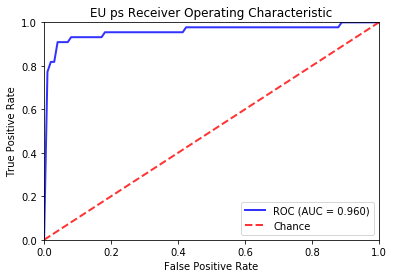

EU ps
auc 0.9600000000000001
ap 0.969409752985569


In [108]:
evalset='cleanEU.csv'
refset = pd.read_csv(evalset,skiprows=0,header=None)
refset.loc[:,1]=">"+refset.loc[:,1]

for h in ['ps']:
    dfs=[]
    for i in range(1):
        inputfile= 'textfiles/inputweightvectors.txt'
        outputfile= 'textfiles/outputweightvectors.txt'
        incoming_vectors = pd.read_csv(inputfile, skiprows=1,sep='|',header=None)
        input_vectors = incoming_vectors.set_index(0).T.to_dict('list')
        outgoing_vectors = pd.read_csv(outputfile, skiprows=1,sep='|',header=None)
        output_vectors = outgoing_vectors.set_index(0).T.to_dict('list')
        dfs.append(getframe(input_vectors,output_vectors,refset))

    getplots(dfs,'EU '+str(h))

Could not represent  6  example pairs.


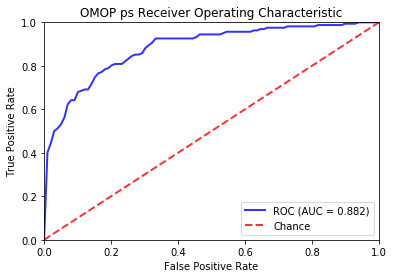

OMOP ps
auc 0.8817807706696595
ap 0.8465319248491793


In [109]:
evalset='cleanRyan.csv'
refset = pd.read_csv(evalset,skiprows=0,header=None)
refset.loc[:,1]=">"+refset.loc[:,1]


for h in ['ps']:
    dfs=[]
    for i in range(1):
        inputfile= 'textfiles/inputweightvectors.txt'
        outputfile= 'textfiles/outputweightvectors.txt'
        incoming_vectors = pd.read_csv(inputfile, skiprows=1,sep='|',header=None)
        input_vectors = incoming_vectors.set_index(0).T.to_dict('list')
        outgoing_vectors = pd.read_csv(outputfile, skiprows=1,sep='|',header=None)
        output_vectors = outgoing_vectors.set_index(0).T.to_dict('list')
        dfs.append(getframe(input_vectors,output_vectors,refset))

    getplots(dfs,'OMOP '+str(h))

## Calculate disproportionality metrics using contingency tables extracted from Lucene

In [10]:
%%bash
#extract 2x2 contingency tables from directory of interest
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/ps_index -startlistfile drugEU.csv > ps_contingencies_drugEU.csv;
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/ps_index -startlistfile drugRyan.csv > ps_contingencies_drugRyan.csv;
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/psss_index -startlistfile drugEU.csv > psss_contingencies_drugEU.csv;
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/psss_index -startlistfile drugRyan.csv > psss_contingencies_drugRyan.csv;
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/full_index -startlistfile drugEU.csv > full_contingencies_drugEU.csv;
java -cp semanticvectors/target/semanticvectors-5.9.jar pitt.search.semanticvectors.experiments.GetContingencyTables -luceneindexpath textfiles/full_index -startlistfile drugRyan.csv > full_contingencies_drugRyan.csv;


Loading startword file: 'drugEU.csv'. Only these 94 words will be indexed.
Initialized LuceneUtils from Lucene index in directory: textfiles/ps_index
Fields in index are: line_number, modified, contents
Loading startword file: 'drugRyan.csv'. Only these 399 words will be indexed.
Initialized LuceneUtils from Lucene index in directory: textfiles/ps_index
Fields in index are: line_number, modified, contents
Loading startword file: 'drugEU.csv'. Only these 94 words will be indexed.
Initialized LuceneUtils from Lucene index in directory: textfiles/psss_index
Fields in index are: line_number, modified, contents
Loading startword file: 'drugRyan.csv'. Only these 399 words will be indexed.
Initialized LuceneUtils from Lucene index in directory: textfiles/psss_index
Fields in index are: line_number, modified, contents
Loading startword file: 'drugEU.csv'. Only these 94 words will be indexed.
Initialized LuceneUtils from Lucene index in directory: textfiles/full_index
Fields in index are: line_

In [6]:
refset = pd.read_csv('ps_contingencies_drugRyan.csv',skiprows=0,header=None,names=["ade", "drug", "label", "a","b","c","d"])
refset=refset[refset['c'] == 0]
refset

,ade,drug,label,a,b,c,d
17,renal_failure_acute,>olmesartan_medoxomil,1,0,41717,0,4614583
35,renal_failure_acute,>endopeptidases,0,0,41717,0,4614583
142,acute_hepatic_failure,>alatrofloxacin,1,0,3378,0,4652922
175,acute_hepatic_failure,>endopeptidases,0,0,3378,0,4652922
253,acute_myocardial_infarction,>endopeptidases,0,0,11499,0,4644801
343,gastrointestinal_haemorrhage,>endopeptidases,0,0,25319,0,4630981


In [37]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
from numpy import *

def dm_performance(refset):
#Proportional Reporting Ratio (PRR) = [a ÷ (a + b)] / [c ÷ (c + d)] 
#Reporting Odds Ratio (ROR) = [a ÷ b] / [c ÷ d]
    a=refset['a']
    b=refset['b']
    c=refset['c']
    d=refset['d']
    
    noc=(refset['c'] == 0)
    
    prrs = (a / (a + b)) / (c / (c + d))
    rors = (a / b) / (c / d)
     
    labels=refset['label']
        
    fpr, tpr, _ = roc_curve(labels,prrs)
    roc_auc = auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(labels,prrs)
    area = auc(recall, precision)
    print('prr ',"auroc: ","{:0.3f}".format(roc_auc),"\tauprc ","{:0.3f}".format(area))
    
    fpr, tpr, _ = roc_curve(labels,rors)
    roc_auc = auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(labels,rors)
    area = auc(recall, precision)
    print('ror ',"auroc: ","{:0.3f}".format(roc_auc),"\tauprc ","{:0.3f}".format(area))

In [38]:
import pandas as pd
eusuffix='_contingencies_drugEU.csv'
omopsuffix='_contingencies_drugRyan.csv'
prefixes=['ps','psss','full']

for evalset in prefixes:
    print(evalset+eusuffix)
    refset = pd.read_csv(evalset+eusuffix,skiprows=0,header=None,names=["ade", "drug", "label", "a","c","b","d"])
    print('skipping ',len(refset[refset['b'] == 0]))
    refset=refset[refset['b'] != 0]
    dm_performance(refset)

for evalset in prefixes:
    print(evalset+omopsuffix)
    refset = pd.read_csv(evalset+omopsuffix,skiprows=0,header=None,names=["ade", "drug", "label", "a","c","b","d"])
    print('skipping ',len(refset[refset['b'] == 0]))
    refset=refset[refset['b'] != 0]
    dm_performance(refset)

ps_contingencies_drugEU.csv
skipping  0
prr  auroc:  0.935 	auprc  0.941
ror  auroc:  0.935 	auprc  0.941
psss_contingencies_drugEU.csv
skipping  0
prr  auroc:  0.918 	auprc  0.931
ror  auroc:  0.919 	auprc  0.932
full_contingencies_drugEU.csv
skipping  0
prr  auroc:  0.841 	auprc  0.836
ror  auroc:  0.843 	auprc  0.840
ps_contingencies_drugRyan.csv
skipping  6
prr  auroc:  0.742 	auprc  0.729
ror  auroc:  0.742 	auprc  0.723
psss_contingencies_drugRyan.csv
skipping  6
prr  auroc:  0.744 	auprc  0.694
ror  auroc:  0.744 	auprc  0.691
full_contingencies_drugRyan.csv
skipping  1
prr  auroc:  0.646 	auprc  0.580
ror  auroc:  0.646 	auprc  0.579
